# 2. Laboratorijske vježbe iz Numeričke matematike- zad 7

Ime i prezime: *Filip Ćelepirović*

Zadan je eliptički integral 
$$K(x)=\int_0^{\frac{\pi}{2}}\frac{1}{\sqrt{1-x^2\sin^2\theta}}d\theta$$

a) Napišite program koji računa vrijednost ovog integrala za zadane ulazne vrijednosti od $x$. Konkretno unutar intervala $[0 ,\  0.9]$ odredite ekvidistantno raspoređene točke $x_i,\quad i=0,1,2,\ldots, n$, za primjerice $n=20$ te izračunajte vrijednost gornjeg integrala koristeći kompozitnu pravokutnu formulu ( možete sami implementirati formulu  ili iskoristiti već ugrađene funkcije). Dobivene vrijednosti pospremite u vektor $y=(y_0,y_1,\ldots,y_n)$
Na temelju dobivenih podataka grafički prikažite funkciju $K(x)$ na intervalu $[0,\  0.9]$.

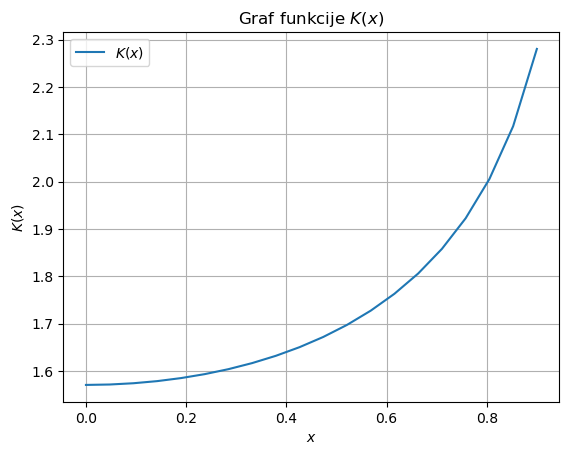

In [1]:
import numpy as np
import matplotlib.pyplot as plt


def integrand(theta, x):
    return 1 / np.sqrt(1 - x**2 * np.sin(theta)**2)


def composite_rectangle_integral(x, n_intervals=1000):
    a, b = 0, np.pi / 2  
    h = (b - a) / n_intervals  
    theta_values = np.linspace(a + h / 2, b - h / 2, n_intervals)  
    integral_value = np.sum(integrand(theta_values, x)) * h
    return integral_value


x_values = np.linspace(0, 0.9, 20)  
y_values = [composite_rectangle_integral(x) for x in x_values]


plt.plot(x_values, y_values, label=r'$K(x)$')
plt.xlabel(r'$x$')
plt.ylabel(r'$K(x)$')
plt.title('Graf funkcije $K(x)$')
plt.grid(True)
plt.legend()
plt.show()


b) Koristeći metodu najmanjih kvadrata dane podatke aproksimirajte polinomima stupnja $n=1, 2,3, 4$. Rezultate prikažite grafički (za prikaz aproksimacijskih polinoma upotrijebite više točaka nego što je zadano u a) dijelu da dobijete glatki prikaz, odnosno izvrijednite dobivene polinome u primjerice 100 točaka u intervalu $[0, 0.9]$)

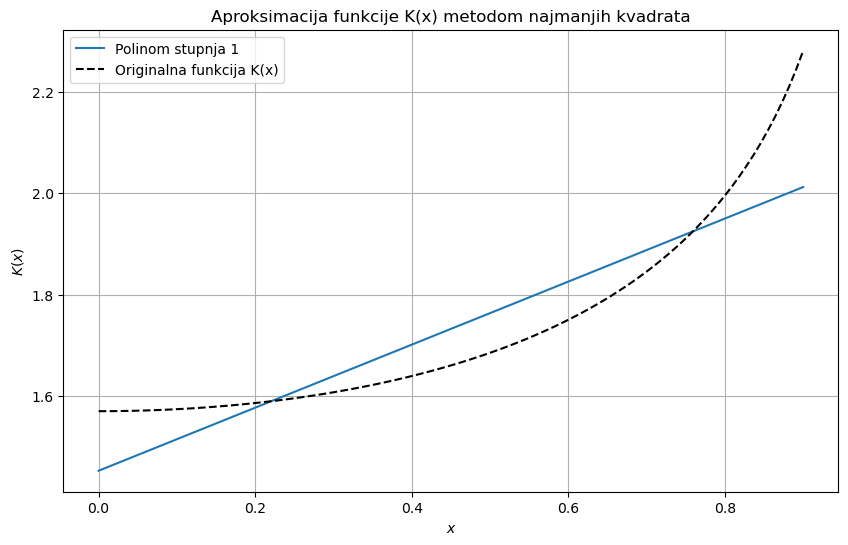

In [2]:

x_values = np.linspace(0, 0.9, 100)
K_values = [composite_rectangle_integral(x) for x in x_values]

degrees = [1]
plt.figure(figsize=(10, 6))

for degree in degrees:
    coeffs = np.polyfit(x_values, K_values, degree)
    poly = np.poly1d(coeffs)
    K_approx = poly(x_values)
    plt.plot(x_values, K_approx, label=f'Polinom stupnja {degree}')


plt.plot(x_values, K_values, 'k--', label='Originalna funkcija K(x)')
plt.xlabel('$x$')
plt.ylabel('$K(x)$')
plt.title('Aproksimacija funkcije K(x) metodom najmanjih kvadrata')
plt.legend()
plt.grid(True)
plt.show()

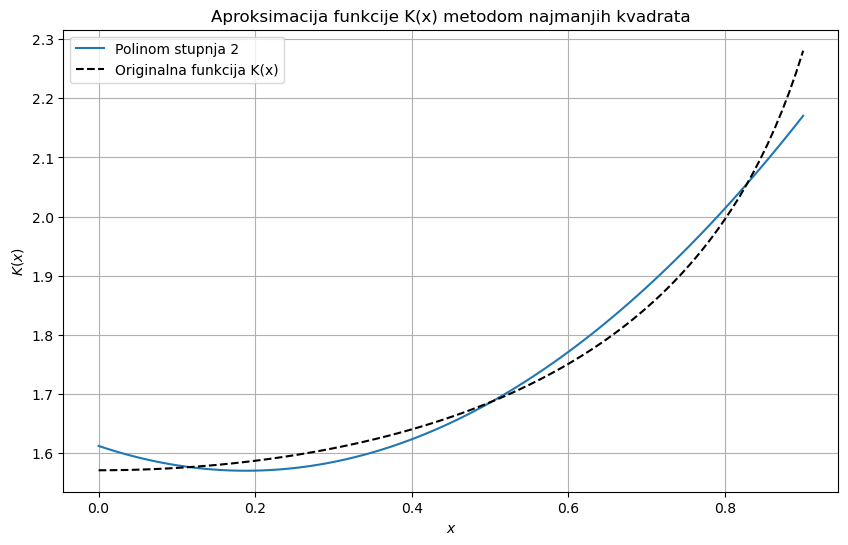

In [5]:
degrees = [2]
plt.figure(figsize=(10, 6))

for degree in degrees:
    coeffs = np.polyfit(x_values, K_values, degree)
    poly = np.poly1d(coeffs)
    K_approx = poly(x_values)
    plt.plot(x_values, K_approx, label=f'Polinom stupnja {degree}')


plt.plot(x_values, K_values, 'k--', label='Originalna funkcija K(x)')
plt.xlabel('$x$')
plt.ylabel('$K(x)$')
plt.title('Aproksimacija funkcije K(x) metodom najmanjih kvadrata')
plt.legend()
plt.grid(True)
plt.show()

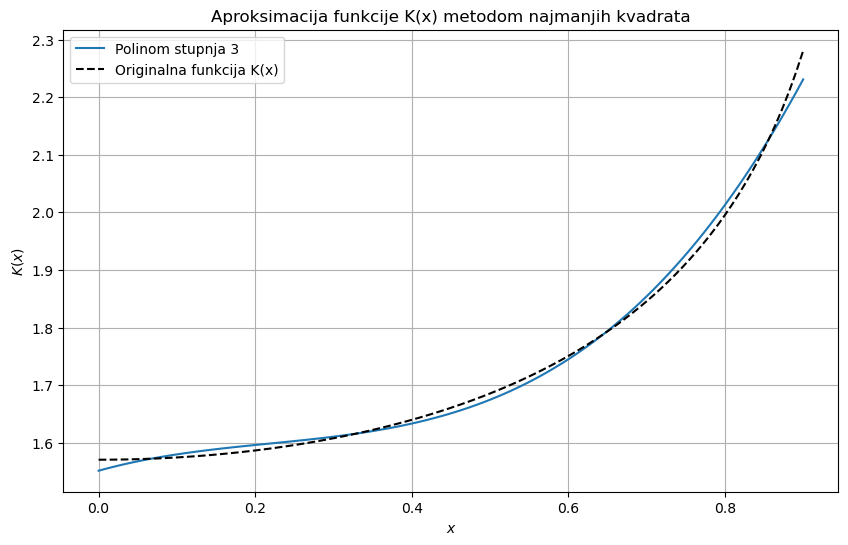

In [4]:
degrees = [3]
plt.figure(figsize=(10, 6))

for degree in degrees:
    coeffs = np.polyfit(x_values, K_values, degree)
    poly = np.poly1d(coeffs)
    K_approx = poly(x_values)
    plt.plot(x_values, K_approx, label=f'Polinom stupnja {degree}')


plt.plot(x_values, K_values, 'k--', label='Originalna funkcija K(x)')
plt.xlabel('$x$')
plt.ylabel('$K(x)$')
plt.title('Aproksimacija funkcije K(x) metodom najmanjih kvadrata')
plt.legend()
plt.grid(True)
plt.show()

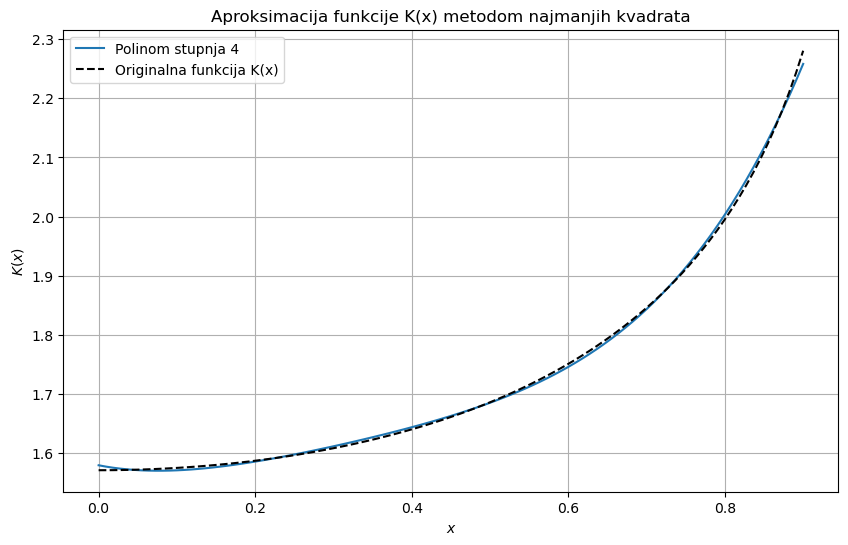

In [6]:
degrees = [4]
plt.figure(figsize=(10, 6))

for degree in degrees:
    coeffs = np.polyfit(x_values, K_values, degree)
    poly = np.poly1d(coeffs)
    K_approx = poly(x_values)
    plt.plot(x_values, K_approx, label=f'Polinom stupnja {degree}')


plt.plot(x_values, K_values, 'k--', label='Originalna funkcija K(x)')
plt.xlabel('$x$')
plt.ylabel('$K(x)$')
plt.title('Aproksimacija funkcije K(x) metodom najmanjih kvadrata')
plt.legend()
plt.grid(True)
plt.show()

c) Izračunajte aproksimaciju navedenog integrala u točki $x=\frac{1}{2}$ koristeći dobivene aproksimacije iz b) dijela zadatka. Usporedite s pravom vrijednošću ovog integrala koju možete dobiti koristeći [link](https://docs.scipy.org/doc/scipy/reference/generated/scipy.special.ellipk.html)

In [18]:
import pandas as pd
from scipy.special import ellipk
from scipy.optimize import curve_fit


def K(x):
    theta = np.linspace(0, np.pi / 2, 1000)
    integrand = 1 / np.sqrt(1 - x**2 * np.sin(theta)**2)
    return np.trapz(integrand, theta)

x_values = np.linspace(0, 0.9, 100)
y_values = np.array([K(x) for x in x_values])

polynomial_degrees = [1, 2, 3, 4]
polynomial_coefficients = [np.polyfit(x_values, y_values, degree) for degree in polynomial_degrees]
x_target = 0.5
approximations = [np.polyval(coeffs, x_target) for coeffs in polynomial_coefficients]

true_value = ellipk(x_target**2)



results = {
    "Stupanj polinoma": polynomial_degrees,
    "Aproksimacija": approximations,
    "Točna vrijednost": [true_value] * len(polynomial_degrees),
    "Pogreška": [abs(true_value - approx) for approx in approximations]
}

results_df = pd.DataFrame(results)
print(results_df.to_string(index=False))

 Stupanj polinoma  Aproksimacija  Točna vrijednost  Pogreška
                1       1.763897           1.68575  0.078147
                2       1.685252           1.68575  0.000498
                3       1.674904           1.68575  0.010846
                4       1.684942           1.68575  0.000809


d) Napišite kratak zaključak

Korištenjem kompozitne pravokutne metode za numeričku integraciju eliptičkog integrala te aproksimacijom podataka polinomima različitih stupnjeva, postigli smo dobre rezultate. Najbolju aproksimaciju za K(x) u točki x=0.5 dao je polinom najvećeg stupnja, stupnja 4. Metoda najmanjih kvadrata pokazala se pouzdanom za aproksimaciju rezultata dobivenih numeričkom integracijom.